### Pima Diabetes Dataset: 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
db = pd.read_csv('pima-indians-diabetes-2.csv')

In [5]:
db.shape

(768, 9)

In [6]:
db.head()

#preg is no. of pregnencies
#plas is plasma/glucose levels
#skin is skin thickness
#test is insulin levels
#mass is BMI
#pedi is Diabetes Pedigree
#class is diabetic or not

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
db.describe(include = 'all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
db.isnull().sum()  #no missing values as per isnull()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

<AxesSubplot:>

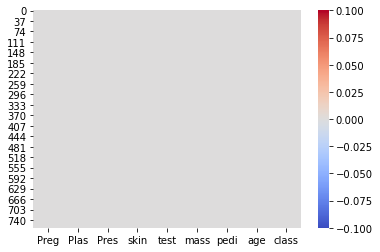

In [10]:
sns.heatmap(db.isnull(), cmap = 'coolwarm')   #can also be confirmed with heatmap that there are no missing values

In [11]:
db.isnull().values.any() #False means no missing values

False

In [12]:
db.corr()  #correlation

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


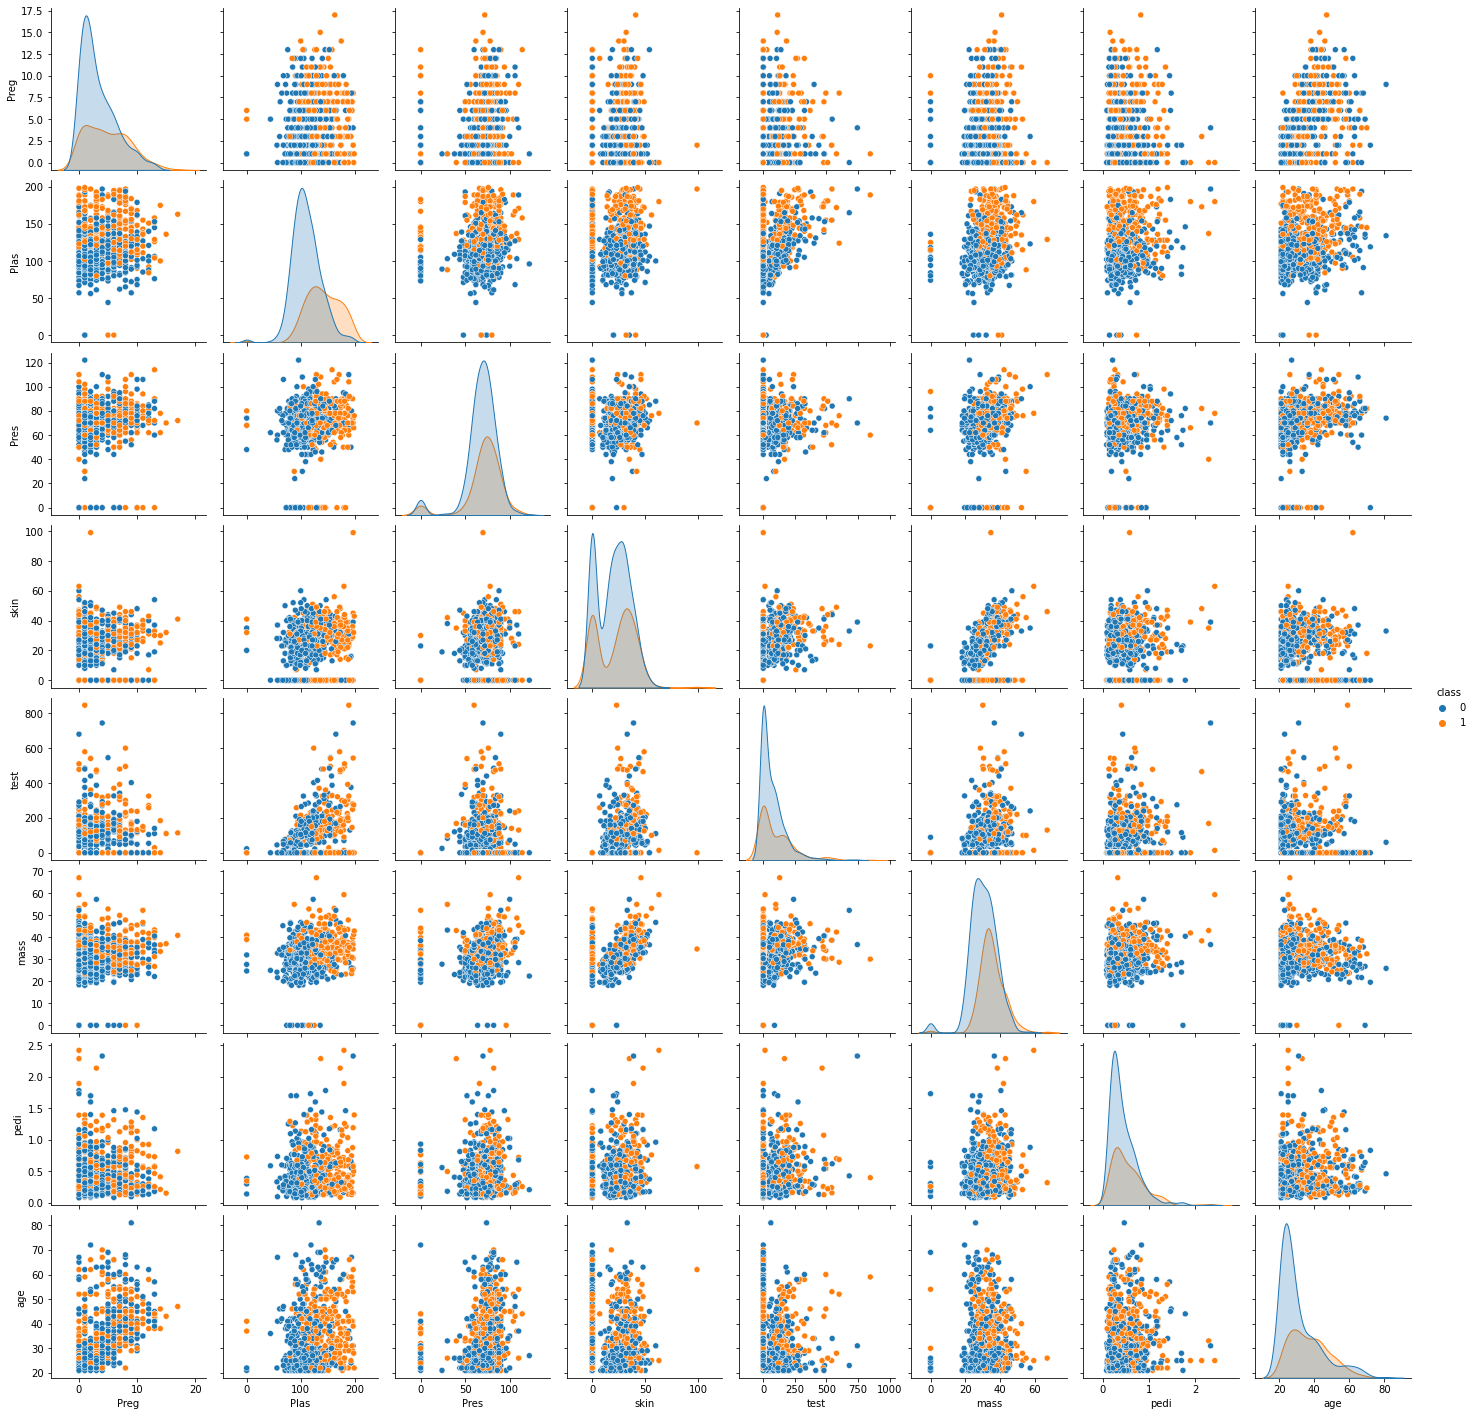

In [13]:
sns.pairplot(db, diag_kind = 'kde', hue= 'class')

#orange dots are diabetic and blue dots are non-diabetic

<AxesSubplot:xlabel='class', ylabel='count'>

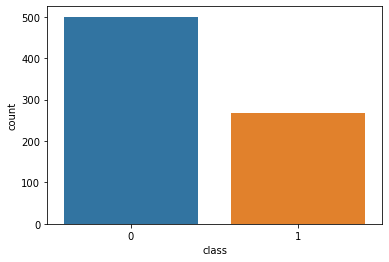

In [14]:
sns.countplot(x='class',data=db)      #gives count of 0 and 1

In [15]:
db['class'].value_counts()  #also gives count of class

0    500
1    268
Name: class, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

x = db.drop('class',axis=1)
y = db['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.70)

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
678,3,121,52,0,0,36.0,0.127,25
208,1,96,64,27,87,33.2,0.289,21
9,8,125,96,0,0,0.0,0.232,54
574,1,143,86,30,330,30.1,0.892,23
383,1,90,62,18,59,25.1,1.268,25


Earlier we found there are no missing vaues but we see lot of 0's in above table. Which are actually missing values.
we can replace those with mean or median

In [17]:
#here we replace 0s with mean

from sklearn.impute import SimpleImputer   # Simple imputer replaces missing values
rep_0 = SimpleImputer(missing_values = 0, strategy = 'mean')
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,3.0,121.0,52.0,29.385417,150.569444,36.000000,0.127,25.0
1,1.0,96.0,64.0,27.000000,87.000000,33.200000,0.289,21.0
2,8.0,125.0,96.0,29.385417,150.569444,32.432331,0.232,54.0
3,1.0,143.0,86.0,30.000000,330.000000,30.100000,0.892,23.0
4,1.0,90.0,62.0,18.000000,59.000000,25.100000,1.268,25.0


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#fit model on train:
model = LogisticRegression(solver = 'liblinear')       ## There are different solvers for different models.
model.fit(x_train, y_train)

#predict on test:
y_predict = model.predict(x_test)
coef_db = pd.DataFrame(model.coef_)
coef_db['intercept'] = model.intercept_
print(coef_db)

          0         1         2         3         4         5        6  \
0  0.130906  0.028024 -0.027255 -0.000063  0.001155  0.041122  0.69979   

          7  intercept  
0  0.010526  -4.903957  


In [26]:
model.score(x_train,y_train)

0.7672253258845437

In [27]:
model.score(x_test, y_test)

0.7445887445887446

### confusion matrix

<AxesSubplot:>

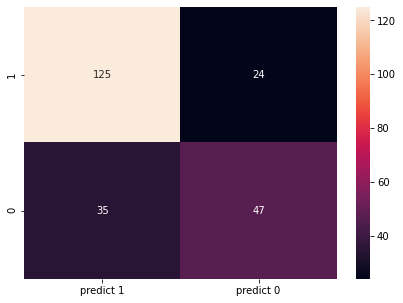

In [31]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

db_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                    columns = [i for i in ['predict 1', 'predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(db_cm, annot = True, fmt = 'g')

The confusion matrix:

True Positives (TP) : we correctly predicted that there are 125 Diabetic (2nd quadrant)

True Negative (TN): we correctly predicted that there are 47 non-diabetic (4th quadrant)

False Positive (FP) (Type 1 Error): we incorrectly predicted that there are 35 diabetic but are not (3rd quadrant)

False Negative (FN) (Type 2 Error): we incorrectly predicted that there are 24 non-diabetic but are diabetic (1st quadrant)

we should try to reduce false negatives in this case as it might prove fatal in future. (type2 errors)